# 부스트코스 3주차 과제

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

!pip install koreanize-matplotlib

import koreanize_matplotlib
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",encoding="cp949")


In [108]:
#원본 데이터 보존, copy본을 사용
df1 = df.copy()

In [109]:
#시각화 전에 결측치 제거
nan = df1.isnull().sum().sort_values(ascending = False)
drop_columns = nan.index.tolist()[:5]
df1 = df1.drop(columns = drop_columns, axis = 1)
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

Q1. 연령대별 허리둘레에 대한 기술 통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [110]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [111]:
df1["연령대"] = df1["연령대코드(5세단위)"].map(age_code)
df1.groupby(["연령대"])["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


In [112]:
#lambda 사용
df1['연령대'] = df1['연령대코드(5세단위)'].apply(lambda x: age_code[x])
df1.groupby('연령대').describe()['허리둘레']

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


In [113]:
#groupby 대신 pivot_table 사용
df['연령대'] = df['연령대코드(5세단위)'].map(age_code)
pd.pivot_table(df, index='연령대', values='허리둘레', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

<Axes: >

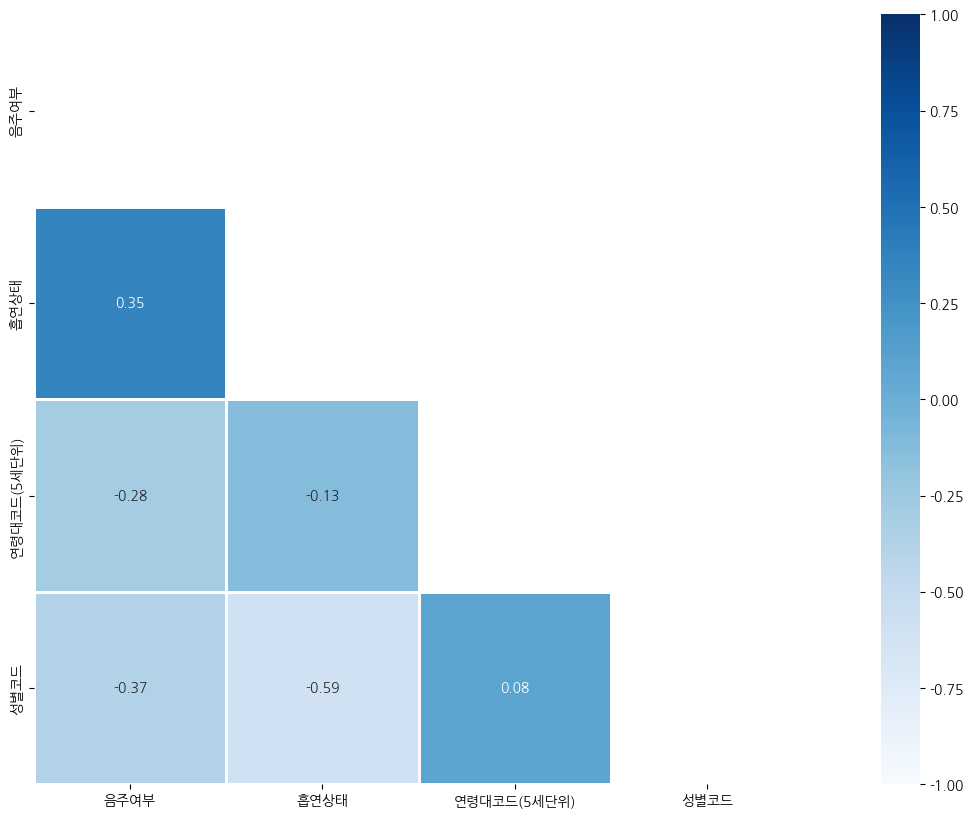

In [114]:
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]

df_c = df[columns]
df_corr = df_c.corr()

mask = np.triu(np.ones_like(df_corr, dtype = bool))

plt.figure(figsize = (20,10))
sns.heatmap(df_corr, annot=True, fmt=".2f", mask=mask, square = True, cmap = "Blues", vmax =1.0, vmin=-1.0, linewidths=1)

 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

In [115]:
#흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
#음주 0(마시지 않은다), 1(마신다)

#replace 활용

smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df1['흡연상태'].replace(smoke, inplace = True)
df1['음주여부'].replace(drink, inplace = True)

pd.crosstab(index = df1['음주여부'], columns = df1['흡연상태'])

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213743,162166
안마심,55334,394503,52845


(array([0, 1, 2]), [Text(0, 0, '끊음'), Text(1, 0, '흡연안함'), Text(2, 0, '흡연중')])

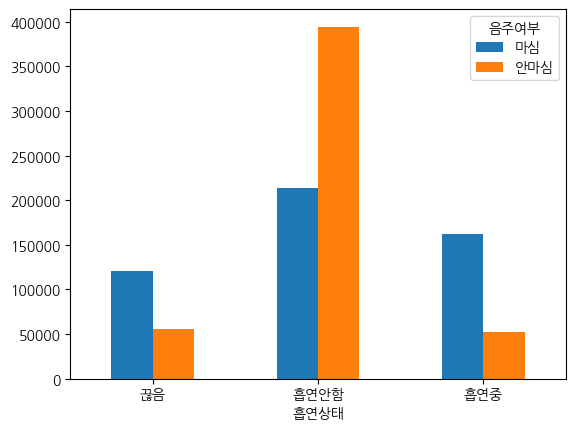

In [116]:
#crosstab을 plot(kind='bar')로 출력
pd.crosstab(index = df1['흡연상태'], columns = df1['음주여부']).plot(kind = 'bar')
plt.xticks(rotation=0)

In [117]:
#map 활용
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df1["흡연"] = df["흡연상태"].map(smoke)
df1["음주"] = df["음주여부"].map(drink)

pd.crosstab(index = df1["음주"], columns = df1["흡연"])

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<Axes: xlabel='흡연', ylabel='count'>

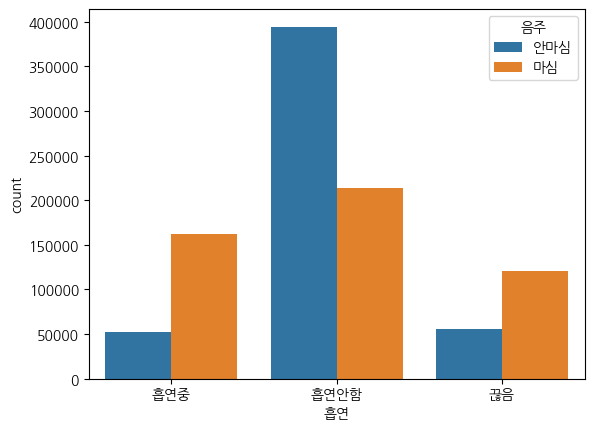

In [118]:
#countplot으로 출력
sns.countplot(data = df1, x = "흡연", hue = "음주")

In [119]:
# pivot_table을 사용한 데이터 집계
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df1["흡연"] = df1["흡연상태"].replace(smoke)
df1["음주"] = df1["음주여부"].replace(drink)

df1.pivot_table(index="음주", columns="흡연", aggfunc="size", fill_value=1)


흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


(array([0, 1, 2]), [Text(0, 0, '끊음'), Text(1, 0, '흡연안함'), Text(2, 0, '흡연중')])

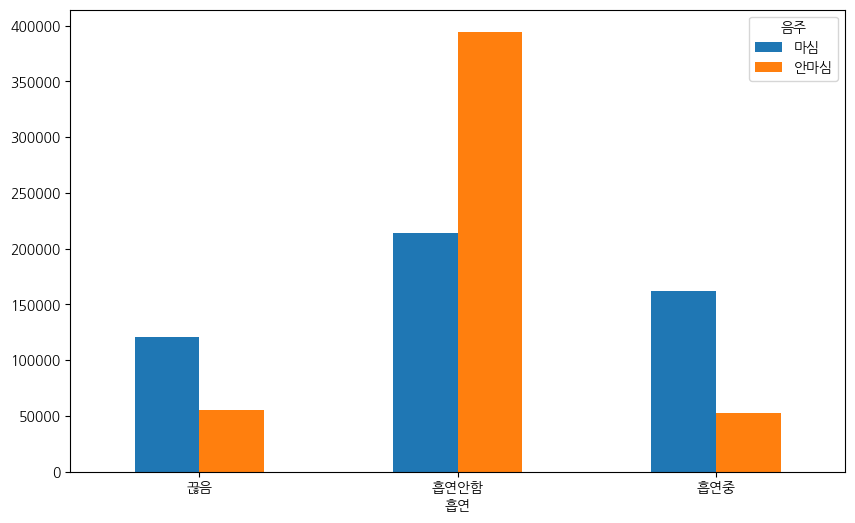

In [120]:
#pivot_table을 막대 그래프로 시각화
pivot_table = df1.pivot_table(index="음주", columns="흡연", aggfunc="size", fill_value=1)

pivot_table.T.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.xticks(rotation=0)

Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

In [121]:
df1_weight = df1[(df1["체중(5Kg 단위)"] >= 120)]

count    1181.000000
mean      199.398815
std        38.676923
min       101.000000
25%       174.000000
50%       197.000000
75%       223.000000
max       512.000000
Name: 총콜레스테롤, dtype: float64


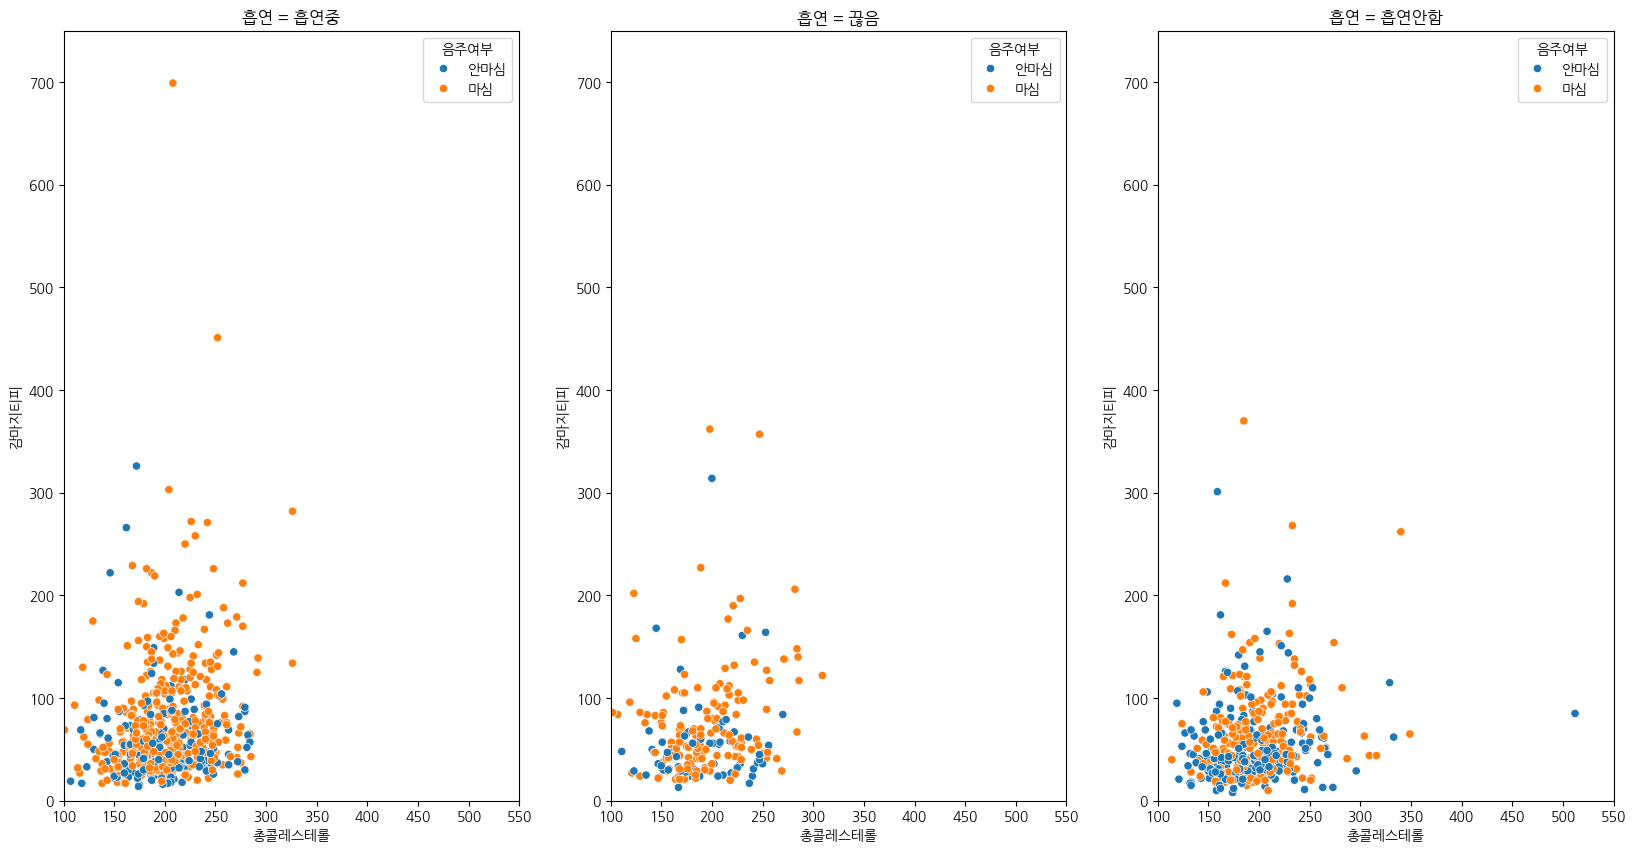

In [122]:
#scatterplot

#numpy 활용해서 기울기와 y절편을 계산 후 회귀선을 추가 할 수 있지만, 여기선 단순 scatterplot만 출력

#lim 범위를 정해주기 위해 최댓값 찾기
print(df1_weight['총콜레스테롤'].describe())

#def를 사용하여 각각 scatterplot을 사용하는 것을 줄여줌
def create_scatterplot(data, ax, title):
    scatter = sns.scatterplot(data=data, x='총콜레스테롤', y='감마지티피', hue='음주여부', ax=ax)
    scatter.set_xlim(100, 550)
    scatter.set_ylim(0, 750)
    ax.set_title(title)

#subplot 생성
fig, axes = plt.subplots(ncols=3, figsize=(20, 10))

#흡연 상태별 데이터 필터링 및 제목 설정
smoke_st = ['흡연중', '끊음', '흡연안함']
titles = ['흡연 = 흡연중', '흡연 = 끊음', '흡연 = 흡연안함']

#루프를 사용하여 각 흡연 상태에 대해 scatterplot 생성
for i, status in enumerate(smoke_st):
    create_scatterplot(df1_weight[df1_weight['흡연상태'] == status], ax=axes[i], title=titles[i])

plt.show()

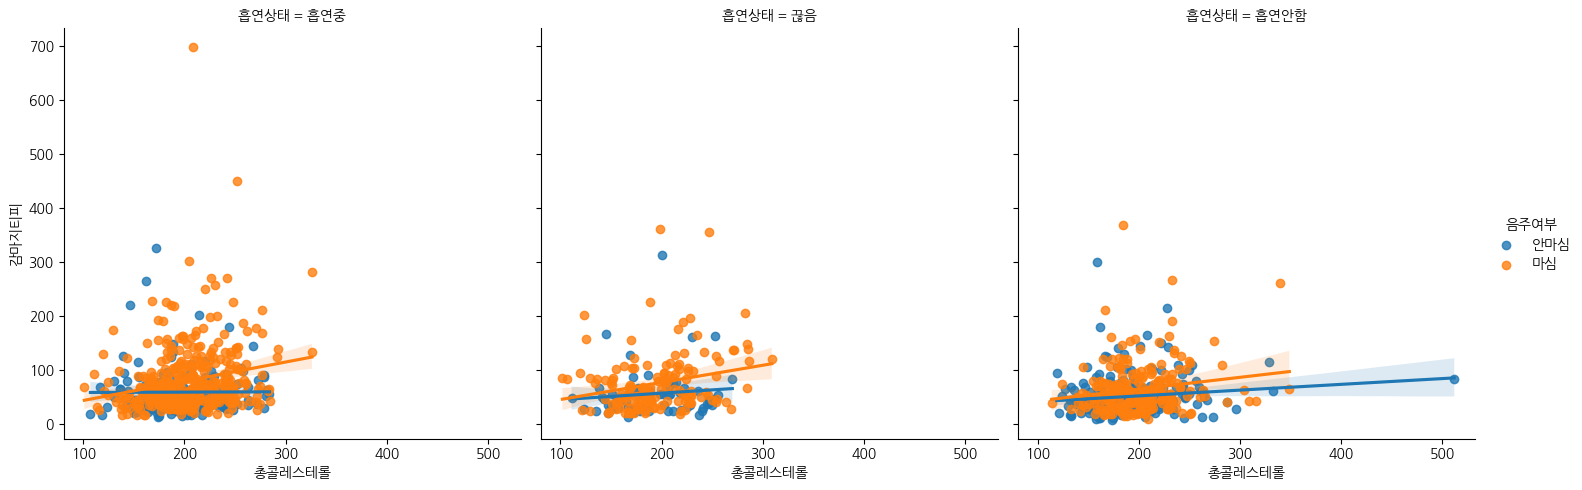

In [123]:
#lmplot로 음주여부에 따라 구현
df1_weight = df1[(df1["체중(5Kg 단위)"] >= 120)]
sns.lmplot(data=df1_weight, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")

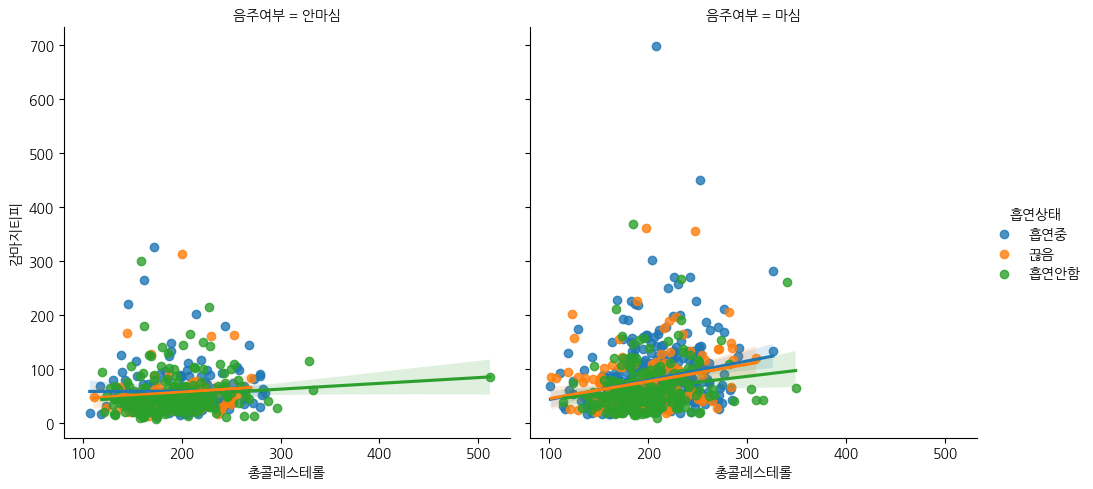

In [124]:
#lmplot로 흡연상태에 따라 구현
sns.lmplot(data=df1_weight, x="총콜레스테롤", y="감마지티피", hue="흡연상태", col="음주여부")

<ipython-input-125-f9725bd4ded1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight["체중구간"] = df_weight["체중(5Kg 단위)"].apply(cate_weight)


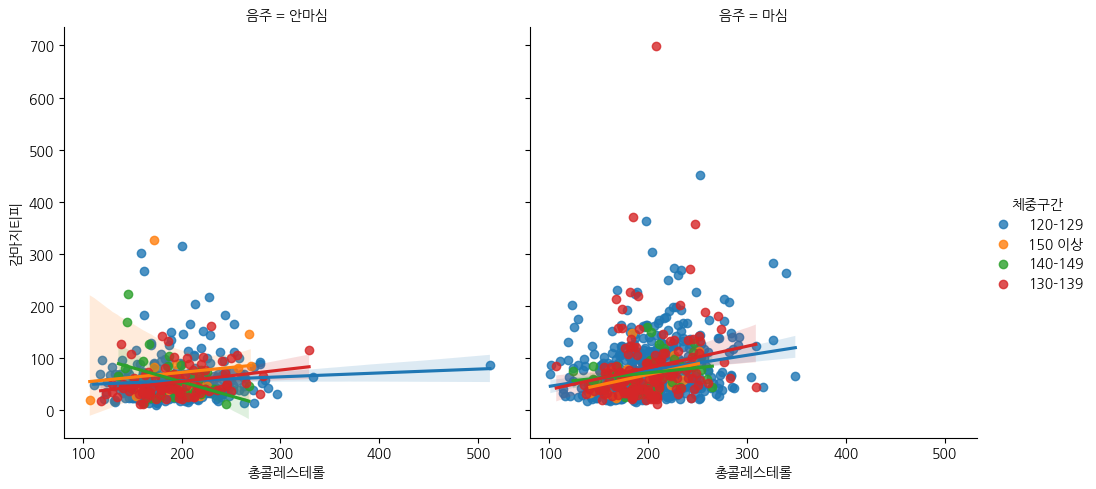

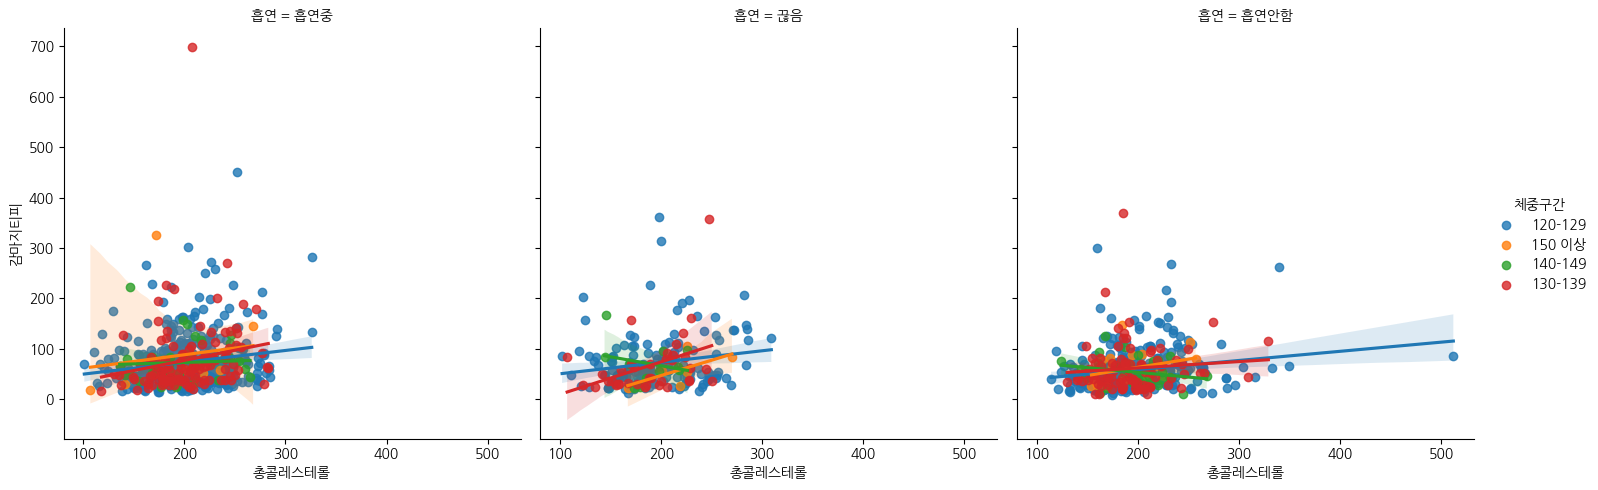

In [125]:
df_weight = df1[(df1["체중(5Kg 단위)"] >= 120)]

#weight의 범위에 따라 그래프 색상 변경
def cate_weight(weight):
  if 120 <= weight < 130:
    return "120-129"
  elif 130 <= weight < 140:
    return "130-139"
  elif 140 <= weight < 150:
    return "140-149"
  else:
    return "150 이상"

df_weight["체중구간"] = df_weight["체중(5Kg 단위)"].apply(cate_weight)

#체중구간에서 음주여부에 따른 그래프
sns.lmplot(data=df_weight, x="총콜레스테롤", y="감마지티피", hue="체중구간", col="음주")

#체중구간에서 흡연여부에 따른 그래프
sns.lmplot(data=df_weight, x="총콜레스테롤", y="감마지티피", hue="체중구간", col="흡연")

Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

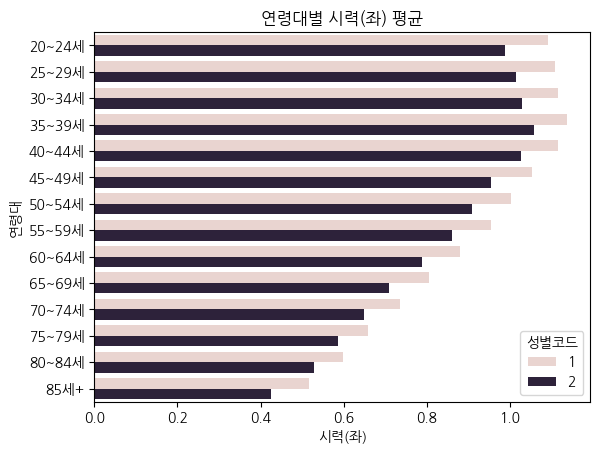

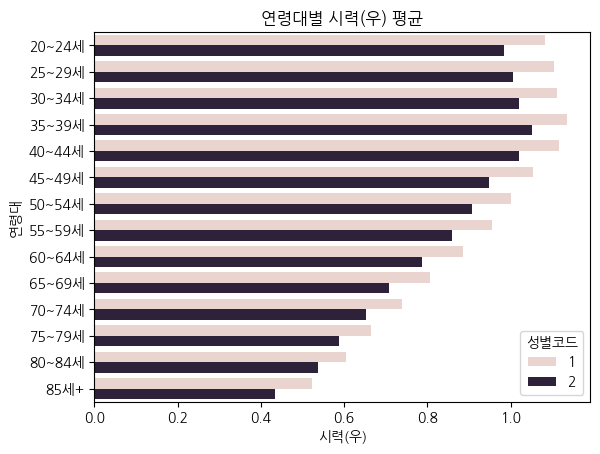

In [126]:
df_sight = df1[(df1["시력(좌)"] != 9.9) & (df1["시력(우)"] != 9.9)]

mean_sight = df_sight.groupby(["연령대", "성별코드"])[["시력(좌)", "시력(우)"]].mean().reset_index()

sns.barplot(data=mean_sight, x="시력(좌)", y="연령대", hue="성별코드")
plt.title("연령대별 시력(좌) 평균")
plt.show()

sns.barplot(data=mean_sight, x="시력(우)", y="연령대", hue="성별코드")
plt.title("연령대별 시력(우) 평균")
plt.show()

In [127]:
#시력이 9.9인 값을 drop 하고 그래프를 구현해도 됨
age_eye = df1[['연령대', '성별코드', '시력(좌)', '시력(우)']]

#9.9값을 가진 행 drop
age_eye2 = age_eye.drop(age_eye[(age_eye['시력(좌)'] == 9.9) | (age_eye['시력(우)'] == 9.9)].index)

#drop이 제대로 되었는지 확인
age_eye2[age_eye2['시력(좌)'] == 9.9]

,연령대,성별코드,시력(좌),시력(우)


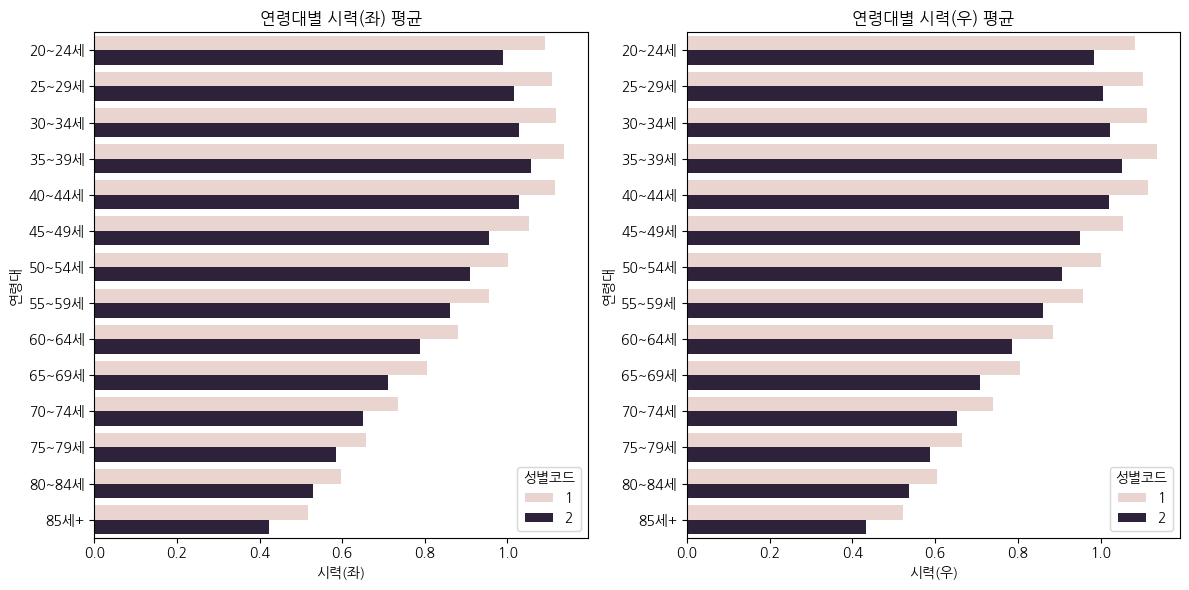

In [128]:
#두 그래프를 한 번에 출력
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.barplot(data=mean_sight, x="시력(좌)", y="연령대", hue="성별코드", ax=ax[0])
ax[0].set_title("연령대별 시력(좌) 평균")

sns.barplot(data=mean_sight, x="시력(우)", y="연령대", hue="성별코드", ax=ax[1])
ax[1].set_title("연령대별 시력(우) 평균")

#그래프가 겹치지 않도록 조정해줌
plt.tight_layout()